# Laplace's Equation in polar coordinates

This Notebook follows some ideas contained in Trefethen's book "Spectral methods in MATLAB," Chapter 11. 



In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt 

# Imports
import scipy as sp
import scipy.linalg as la


<matplotlib.contour.QuadContourSet instance at 0x7efbda330368>

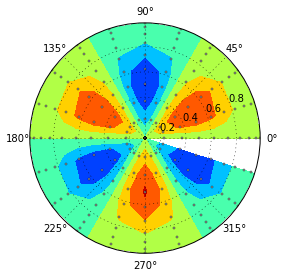

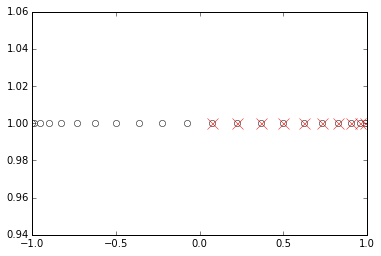

In [41]:
# Make a chebychev domain for the unit disk

Nr = 10
Ntheta_twos = 10


## Domain in radius
Nx = 2 * (Nr + 1)
jx = sp.arange(Nx)
x = sp.cos(jx * sp.pi / (Nx-1))
jr = sp.arange(1, Nr+1)
r = x[jr]

plt.plot(x, sp.ones_like(x), 'o', color='white')
plt.plot(r, sp.ones_like(r), 'x', color='red', markersize=11)

## Domain in angle
Ntheta = 2 * Ntheta_twos
jtheta = sp.arange(Ntheta)  # includes theta = 0 = 2*pi 
theta = 2 * sp.pi * jtheta / Ntheta

## Domain in both
rr, tt = sp.meshgrid(r, theta, indexing='ij')
xx = rr * sp.cos(tt)
yy = rr * sp.sin(tt)


# Make a figure of the nodes
f0 = plt.figure(0)
f0.clear()
a0 = f0.add_axes([.1, .1, .8, .8], polar=True)
p0 = a0.plot(tt, rr, 'o', color='white', markersize=2)

# Plot a function 
fpolar = (rr-1)**2 * (rr)**2 * sp.sin(3*tt)
plt.contourf(tt, rr, fpolar, polar=True)

[-3.80062601+0.j         -3.56539446-1.2208178j  -3.56539446+1.2208178j
 -2.92372265-2.23700486j -2.92372265+2.23700486j -2.02530474-2.92841924j
 -2.02530474+2.92841924j  3.41186208-0.65273j     3.41186208+0.65273j
  2.98426826-1.80188542j  2.98426826+1.80188542j  2.37020780-0.j
  2.19150111-2.63457948j  2.19150111+2.63457948j -1.01750488-3.27469399j
 -1.01750488+3.27469399j  1.18401241-3.0899493j   1.18401241+3.0899493j
  0.44239477-2.56265851j  0.44239477+2.56265851j  0.03309720-3.2945426j
  0.03309720+3.2945426j ]


/home/will/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: divide by zero encountered in divide


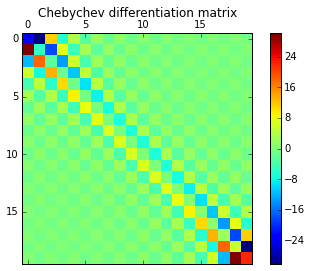

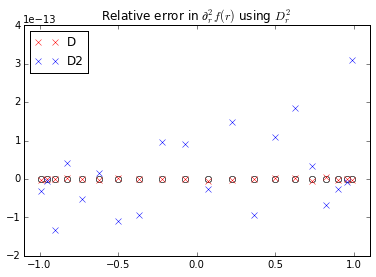

In [42]:
# Assemble the differentiation matrices
#N = Nx
#j = sp.arange(N+1)
#x = _r

D = sp.zeros((Nx, Nx))
N = Nx - 1

## fill in the middle values (eveywhere)
Dmid = (-1.0)**(jx[1:-1, None] + jx[None, 1:-1]) / (x[1:-1, None] - x[None, 1:-1])
D[1:-1,1:-1] = Dmid#[1:-1, 1:-1]

## Fill in the diagonals
Ddiag = 0.0 * x #- x / (2 * (1 - x**2))
Idiag = sp.diag_indices_from(D)
D[Idiag] = Ddiag


## Fill in the top
top = 2 * (-1)**(jx[1:-1]) / (1 - x[1:-1])
bot = -2 * (-1)**(N + jx[1:-1]) / (1 + x[1:-1])
left = -.5 * (-1)**(jx[1:-1]) / (1 - x[1:-1])
right = .5 * (-1)**(N + jx[1:-1]) / (1 + x[1:-1])
D[0, 1:-1] = top
D[-1, 1:-1] = bot
D[1:-1, 0] = left
D[1:-1, -1] = right

## Fill in the corners
#D[0, 0] = (2.0 * N**2 + 1) / 6.0
D[0, -1] = .5 * (-1)**N
D[-1, 0] = -.5 * (-1)**N
#D[-1, -1] = - (2.0 * N**2 + 1) / 6.0

## Fill diagonals by summing over non-diagonal entries
for i in range(N+1):
    D[i, i] = -1.0 * D[i, :].sum()

    
    
    

    
## remove the edges
#D = D[1:-1, 1:-1]


# Store the matrix as Dr to make distinct from Dtheta
Dr = D[1:-1, 1:-1]
Dr2 = sp.dot(D, D)[1:-1, 1:-1]


## Plot the differentiation matrix
#plt.matshow(Dr)
#plt.title("The Chebyshev differentiation matrix")



# show the matrix
f1 = plt.figure(1)
a1 = f1.add_axes([.1, .1, .8, .8])
#Dr2 = sp.dot(Dr, Dr)
plotD = a1.matshow(Dr)
a1.set_title("Chebychev differentiation matrix")
f1.colorbar(plotD)




## compute a function and differentiate it
_r = x[1:-1]
fvals = 2 * (_r-1)**2 * (_r+1)**2
df = sp.dot(Dr, fvals)   # take the second derivative
df_true = 2 * (2 * (_r-1)*(_r+1)**2 + 2 *(_r-1)**2 * (_r+1))                # second derivative
df2 = sp.dot(Dr2, fvals)
df2_true = 2.0 * (2 * (_r+1)**2 
                 + 4 * (_r-1) * (_r+1)
                 + 4 * (_r-1) * (_r+1)
                  + 2 * (_r-1)**2)


## Plot the test case for differentiation 
f2 = plt.figure(2)
a2 = f2.add_axes([.1, .1, .8, .8])
a2.plot(_r, df_true-df_true, 'o', color='white')
a2.plot(_r, df2_true-df2_true, 'o', color='white')
a2.plot(_r, df-df_true, 'x', color='red', label='D')
a2.plot(_r, df2-df2_true, 'x', color='blue', label="D2")
a2.legend(loc='best')

#a2.set_ybound((.5, 1.1))
a2.set_xbound([-1.1, 1.1])
a2.set_title(r"Relative error in $\partial_{r}^{2}f(r)$ using $D_{r}^{2}$")


## Compute the eigenvalues
print(-1 * la.eigvals(D))


error = 1.0
[ -1.00000000e+02  -8.10000000e+01  -8.10000000e+01  -6.40000000e+01
  -6.40000000e+01  -4.90000000e+01  -4.90000000e+01  -3.60000000e+01
  -3.60000000e+01  -2.50000000e+01  -2.50000000e+01  -1.60000000e+01
  -1.60000000e+01  -9.00000000e+00  -9.00000000e+00  -4.00000000e+00
  -4.00000000e+00  -1.00000000e+00  -1.00000000e+00  -6.03961325e-14]


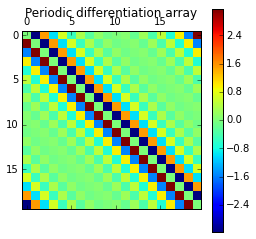

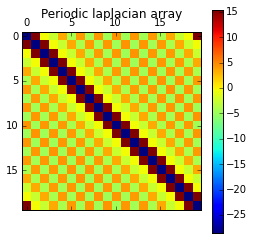

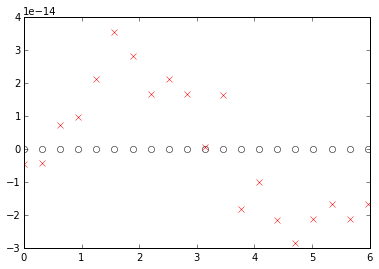

In [43]:
# Compute the differentiation matrix for theta (periodic domain)

## Compute the periodic Sinc function derivatives
v = sp.zeros(Ntheta)
h = 2 * sp.pi / Ntheta
v[1:] = (-1)**jtheta[1:] / (2.0 * sp.tan(jtheta[1:] * h / 2))

## Store these values in the differentiation array by rolling 
Dtheta = sp.zeros((Ntheta, Ntheta))
for i in range(Ntheta):
    Dtheta[i, :] = sp.roll(v, i)

_Dtheta2 = sp.dot(Dtheta, Dtheta)
    
## Compute the second order derivative
Dtheta2 = sp.zeros((Ntheta, Ntheta))    
v = sp.zeros(Ntheta)
v[0] = -sp.pi**2 / (3 * h**2) - 1.0 / 6.0
v[1:] = -1 * (-1)**(jtheta[1:]) / (2 * sp.sin(jtheta[1:]*h/2)**2)
for i in range(Ntheta):
    Dtheta2[i, :] = sp.roll(v, i)

print("error = {0}".format(abs(Dtheta2-_Dtheta2).mean() / abs(Dtheta2).mean()))
print(la.eigvalsh(Dtheta2))


## Show the differentiation arrays
plt.matshow(Dtheta)
plt.colorbar()
plt.title("Periodic differentiation array")
plt.matshow(sp.dot(Dtheta, Dtheta))
plt.colorbar()
plt.title("Periodic laplacian array")

## Show the error
fvals = -sp.sin(theta)
df2_true = sp.sin(theta)
df2 = sp.dot(Dtheta2, fvals)
f3 = plt.figure(3)
a3 = f3.add_axes([.1, .1, .8, .8])
a3.plot(theta, df2_true - df2_true, 'o', color='white')
a3.plot(theta, df2 - df2_true, 'x', color='red')


(200, 200)


<matplotlib.colorbar.Colorbar instance at 0x7efbd94b7cf8>

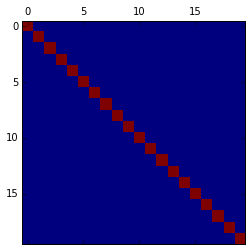

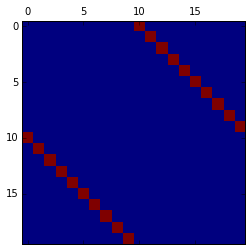

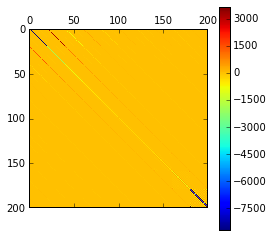

In [44]:
# Compute the matricies needed for the polar coordinate problem
#Dr2 = sp.dot(Dr, Dr)
_D1 = Dr2[:Nr, :Nr][:, None, :, None]
_D2 = Dr2[:Nr, Nr:][:, None, :, None]
_E1 = Dr[:Nr, :Nr][:, None, :, None]
_E2 = Dr[:Nr, Nr:][:, None, :, None]




R = sp.diag(1.0 / r)[:, None, :, None]
R2 = sp.diag(1.0 / r**2)[:, None, :, None]

_Dtheta2 = Dtheta2[None, :, None, :]


Itheta = (sp.eye(Ntheta)[None, :, None, :])
Itheta_roll = sp.roll(sp.eye(Ntheta), Ntheta//2, 1)[None, :, None, :]

plt.matshow(Itheta.reshape(Ntheta, -1))
plt.matshow(Itheta_roll.reshape(Ntheta, -1))


## Define the laplacian in polar coordinates shape ~ (Nr, Ntheta, Nr, Ntheta)
L = sp.zeros((Nr, Ntheta, Nr, Ntheta))


L += (_D1 * Itheta + _D2 * Itheta_roll  
      + R*_E1 * Itheta + R * _E2 * Itheta_roll
      + R2 * _Dtheta2)
L = L.reshape(Nr*Ntheta, Nr*Ntheta)
print(L.shape)


plt.matshow(L)
plt.colorbar()
#la.eigvals(L)



In [45]:
(L<1e-10).sum() / float(L.size)

0.90000000000000002

In [46]:
sp.sqrt(-1 * la.eigvalsh(L))

array([ 134.33669874,  121.10350459,  121.10350459,  107.71743879,
        107.71743879,   95.5003991 ,   95.29273578,   95.29273578,
         95.18113949,   95.18113949,   95.11839389,   95.11839389,
         95.06150808,   95.06150808,   94.99456386,   94.99456386,
         94.97246681,   94.9001817 ,   94.9001817 ,   94.61459582,
         94.61459582,   94.52378524,   94.52378524,   94.47934218,
         94.47934218,   94.13887471,   94.13887471,   81.13276569,
         81.13276569,   68.09258881,   68.09258881,   54.82507636,
         54.82507636,   46.71904221,   44.37087019,   43.92379336,
         43.92379336,   43.88045679,   43.88045679,   43.55388321,
         43.55388321,   43.46212074,   43.46212074,   43.28830115,
         43.28830115,   43.14601099,   43.14601099,   43.13312333,
         43.13312333,   43.07915362,   42.93679861,   42.93679861,
         42.82794099,   42.82794099,   42.46237436,   42.46237436,
         42.1431798 ,   42.1431798 ,   38.19960974,   38.19960

<matplotlib.colorbar.Colorbar instance at 0x7efbd9d3d2d8>

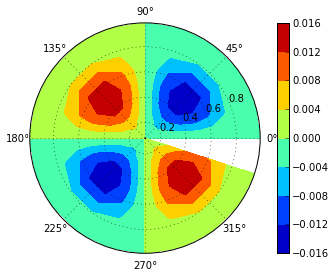

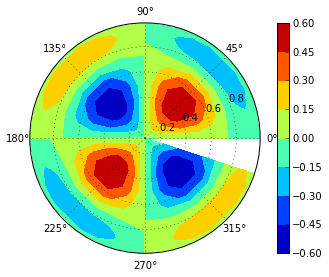

In [47]:

# Plot a function 
f10 = plt.figure(10)
a10 = f10.add_axes([.1, .1, .8, .8], polar=True)
fpolar = (rr-1)**3 * (rr)**3 * sp.sin(2*tt)
cf = a10.contourf(tt, rr, fpolar, polar=True)
f10.colorbar(cf)


# Plot a function 
f11 = plt.figure(11)
a11 = f11.add_axes([.1, .1, .8, .8], polar=True)

#compute laplacian 
Lf = sp.dot(L, fpolar.flatten()).reshape([Nr, Ntheta]) 

cf = a11.contourf(tt, rr, Lf, polar=True)
f11.colorbar(cf)